/mnt/NAS/CLC/181221_R65D11-tdTomGC6fopt/Fly1/CO2xzGG/behData_007/images


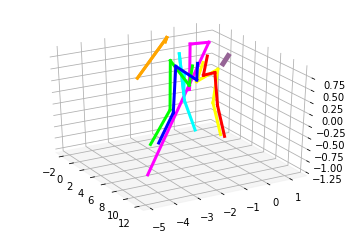

In [7]:
import deepfly
import deepfly.core as core
import numpy as np
from deepfly.cv_util import triangulate_linear
from deepfly.plot_util import plot_drosophila_3d, normalize_pose_3d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import itertools
c = core.Core(input_folder='/mnt/NAS/CLC/181221_R65D11-tdTomGC6fopt/Fly1/CO2xzGG/behData_007/images/', output_subfolder='df3d_5', num_images_max=200)
c.camNetAll.triangulate()


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plot_drosophila_3d(ax, normalize_pose_3d(c.camNetAll.points3d_m.copy(),rotate=True)[195], cam_id=1, lim=None)

In [10]:
def triangulate(camNet, cam_id_list, img_id, j_id):
    cam_list_iter = list()
    points2d_iter = list()
    for cam in [camNet.cam_list[cam_idx] for cam_idx in cam_id_list]:
        cam_list_iter.append(cam)
        points2d_iter.append(cam[img_id, j_id, :])
    return triangulate_linear(
        cam_list_iter, points2d_iter
    )

In [11]:
img_id_list, j_id_list = np.where(np.abs(c.camNetAll.points3d_m)  > 5)[0], np.where(np.abs(c.camNetAll.points3d_m)  > 5)[1]
print(img_id_list, j_id_list)
for img_id in img_id_list:
    for j_id in j_id_list:
        r_list = list()
        pt3d_list = list()
        
        cam_id_list = [0,1,2] if j_id < 19 else [4,5,6]
        for cam_id_list in itertools.combinations(cam_id_list, 2):
            pt3d = triangulate(c.camNetAll, cam_id_list, img_id, j_id)
            r_err = np.mean([np.linalg.norm(c.camNetAll.cam_list[cam_id].project(pt3d) - c.camNetAll.cam_list[cam_id].points2d[img_id,j_id]) for cam_id in cam_id_list])
            r_list.append(r_err)
            pt3d_list.append(pt3d)

        best_camera_tuple = np.argmin(r_list)
        c.camNetAll.points3d_m[img_id, j_id] = pt3d_list[best_camera_tuple]

[195] [28]


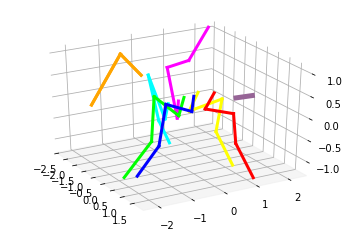

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plot_drosophila_3d(ax, normalize_pose_3d(c.camNetAll.points3d_m.copy(),rotate=True)[195], cam_id=1, lim=None)